In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
X.shape, y.shape

((150, 2), (150,))

In [4]:
n_neighbors = 15

In [5]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

In [6]:
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

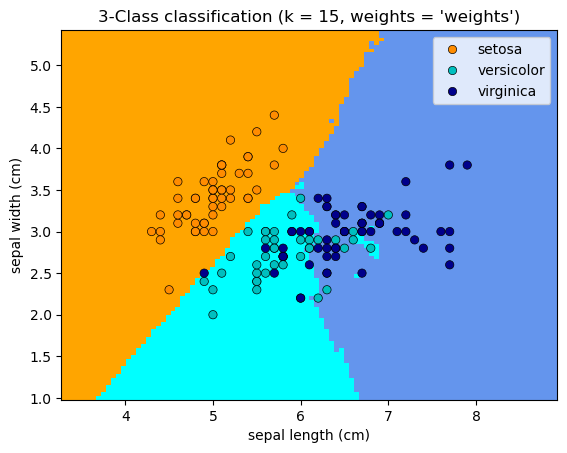

In [7]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, "weights")
)

plt.show()

In [8]:
clf.predict([X[100]])

array([2])

In [9]:
X[100]

array([6.3, 3.3])

In [16]:
import pandas as pd

# Get distances and indices of the nearest neighbors
distances, indices = clf.kneighbors()

# Create a DataFrame to display the results
df = pd.DataFrame({
    "Point Index": range(len(indices)),
    "Neighbor Indices": [list(neighbors) for neighbors in indices],
    "Distances": [list(d) for d in distances]
})

df

,Point Index,Neighbor Indices,Distances
0,0,"[17, 40, 43, 39, 27, 4, 26, 7, 28, 23, 21, 37,...","[0.0, 0.09999999999999964, 0.09999999999999964..."
1,1,"[25, 34, 9, 12, 45, 30, 35, 2, 29, 49, 3, 23, ...","[0.09999999999999964, 0.10000000000000009, 0.1..."
2,2,"[29, 47, 30, 3, 11, 24, 6, 45, 12, 9, 34, 1, 4...","[0.0, 0.10000000000000053, 0.1414213562373093,..."
3,3,"[47, 2, 29, 30, 42, 38, 12, 45, 8, 6, 9, 34, 1...","[0.10000000000000009, 0.14142135623730995, 0.1..."
4,4,"[37, 43, 40, 17, 21, 0, 7, 26, 44, 46, 19, 39,...","[0.09999999999999964, 0.10000000000000009, 0.1..."
...,...,...,...
145,145,"[77, 112, 140, 86, 65, 75, 58, 104, 116, 147, ...","[0.0, 0.09999999999999964, 0.10000000000000009..."
146,146,"[72, 87, 123, 134, 111, 133, 68, 126, 132, 128...","[0.0, 0.20000000000000018, 0.20000000000000018..."
147,147,"[116, 104, 75, 137, 74, 58, 54, 110, 145, 77, ...","[0.0, 0.0, 0.09999999999999964, 0.141421356237..."
148,148,"[136, 100, 56, 85, 51, 115, 70, 110, 137, 91, ...","[0.09999999999999964, 0.1414213562373093, 0.14..."


In [24]:
df.iloc[0, 1].__len__(), df.iloc[0, 2].__len__()

(15, 15)